# Crypto Data Analysis Project

#### Objective:
   * Analyze top cryptocurrency data to understand market positions, trading activity, price movements, and historical ROI. The pipeline uses
   * Python and Pandas for ETL (Extract, Transform, Load), calculations, and basic visualization.

#### Data Source:
#### CoinGecko API 
 * Top 5 coins by market cap
https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=5&page=1

##### Step 1: Fetch the Data

##### Purpose:
* Get the latest market data for the top cryptocurrencies.

##### Explanation:

* requests fetches the API data.

* pd.json_normalize() flattens nested JSON fields for easier analysis.

* Data now contains fields like current_price, market_cap, total_volume, ath, atl, roi, etc.

In [3]:
import requests
import pandas as pd

url = "https://api.coingecko.com/api/v3/coins/markets"

In [57]:
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 5,
    "page": 1
}

response = requests.get(url, params=params)
data = response.json()

#"vs_currency"
#C["vs_currency"]

In [59]:
data

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400',
  'current_price': 67649,
  'market_cap': 1352401724694,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1352401724694,
  'total_volume': 20446945555,
  'high_24h': 68212,
  'low_24h': 67247,
  'price_change_24h': -330.0064302182145,
  'price_change_percentage_24h': -0.48545,
  'market_cap_change_24h': -6916306389.45752,
  'market_cap_change_percentage_24h': -0.50881,
  'circulating_supply': 19993359.0,
  'total_supply': 19993359.0,
  'max_supply': 21000000.0,
  'ath': 126080,
  'ath_change_percentage': -46.34451,
  'ath_date': '2025-10-06T18:57:42.558Z',
  'atl': 67.81,
  'atl_change_percentage': 99663.72423,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2026-02-22T23:58:11.199Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://coin-images.coingecko.com/coins/images/27

In [61]:
# Flatten JSON to DataFrame
df = pd.json_normalize(data)

In [67]:
# Preview the DataFrame
print(df.head())

            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3       ripple    xrp       XRP   
4  binancecoin    bnb       BNB   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...   67649.000000   
1  https://coin-images.coingecko.com/coins/images...    1956.940000   
2  https://coin-images.coingecko.com/coins/images...       0.999694   
3  https://coin-images.coingecko.com/coins/images...       1.390000   
4  https://coin-images.coingecko.com/coins/images...     614.500000   

      market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  1352401724694                1            1352401724694   20446945555   
1   236181792286                2             236181792286   10145721106   
2   183565821564                3             189031019645   34743429347   
3    84915416750                4             139143321954

In [65]:
# First 5 rows
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,67649.000000,1352401724694,1,1352401724694,20446945555,68212.00000,...,-46.34451,2025-10-06T18:57:42.558Z,67.810000,9.966372e+04,2013-07-06T00:00:00.000Z,NaN,2026-02-22T23:58:11.199Z,NaN,NaN,NaN
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,1956.940000,236181792286,2,236181792286,10145721106,1981.09000,...,-60.43434,2025-08-24T19:21:03.333Z,0.432979,4.518705e+05,2015-10-20T00:00:00.000Z,NaN,2026-02-22T23:58:12.241Z,37.66859,btc,3766.859033
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.999694,183565821564,3,189031019645,34743429347,0.99983,...,-24.44399,2018-07-24T00:00:00.000Z,0.572521,7.460984e+01,2015-03-02T00:00:00.000Z,NaN,2026-02-22T23:58:14.809Z,NaN,NaN,NaN
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,1.390000,84915416750,4,139143321954,1534042890,1.43000,...,-61.83453,2025-07-18T03:40:53.808Z,0.002686,5.170753e+04,2014-05-22T00:00:00.000Z,NaN,2026-02-22T23:58:14.641Z,NaN,NaN,NaN
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,614.500000,83791878407,5,83791878407,538756231,626.63000,...,-55.14539,2025-10-13T08:41:24.131Z,0.039818,1.543195e+06,2017-10-19T00:00:00.000Z,NaN,2026-02-22T23:58:10.997Z,NaN,NaN,NaN


### Step 2: Clean and Transform Data

##### Purpose:
* Ensure numeric consistency, calculate new metrics like % from ATH/ATL, and handle missing ROI

### Explanation:

* Converts numeric columns to floats for calculations.

* Missing ROI values are replaced with 0 for consistency.

* % from ATH/ATL gives insight into market positioning.

* last_updated is converted to datetime for temporal analysis.

In [93]:
# Convert columns to numeric
numeric_cols = ['current_price','market_cap','total_volume','ath','atl','price_change_24h','price_change_percentage_24h']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


print(numeric_cols)
#return(numeric_cols)

['current_price', 'market_cap', 'total_volume', 'ath', 'atl', 'price_change_24h', 'price_change_percentage_24h']


In [97]:
# Handle ROI missing values
df['roi_percentage'] = df['roi.percentage'].fillna(0)

df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage,roi_percentage
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,67649.000000,1352401724694,1,1352401724694,20446945555,68212.00000,...,2025-10-06T18:57:42.558Z,67.810000,9.966372e+04,2013-07-06T00:00:00.000Z,NaN,2026-02-22T23:58:11.199Z,NaN,NaN,NaN,0.000000
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,1956.940000,236181792286,2,236181792286,10145721106,1981.09000,...,2025-08-24T19:21:03.333Z,0.432979,4.518705e+05,2015-10-20T00:00:00.000Z,NaN,2026-02-22T23:58:12.241Z,37.66859,btc,3766.859033,3766.859033
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.999694,183565821564,3,189031019645,34743429347,0.99983,...,2018-07-24T00:00:00.000Z,0.572521,7.460984e+01,2015-03-02T00:00:00.000Z,NaN,2026-02-22T23:58:14.809Z,NaN,NaN,NaN,0.000000
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,1.390000,84915416750,4,139143321954,1534042890,1.43000,...,2025-07-18T03:40:53.808Z,0.002686,5.170753e+04,2014-05-22T00:00:00.000Z,NaN,2026-02-22T23:58:14.641Z,NaN,NaN,NaN,0.000000
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,614.500000,83791878407,5,83791878407,538756231,626.63000,...,2025-10-13T08:41:24.131Z,0.039818,1.543195e+06,2017-10-19T00:00:00.000Z,NaN,2026-02-22T23:58:10.997Z,NaN,NaN,NaN,0.000000


In [99]:
# Calculate % distance from ATH and ATL
df['pct_from_ath'] = ((df['ath'] - df['current_price']) / df['ath']) * 100
df['pct_from_atl'] = ((df['current_price'] - df['atl']) / df['atl']) * 100

df['pct_from_ath']
df['pct_from_atl']

0    9.966257e+04
1    4.518711e+05
2    7.461263e+01
3    5.164577e+04
4    1.543184e+06
Name: pct_from_atl, dtype: float64

In [101]:
# Convert last_updated to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])

df['last_updated']

0   2026-02-22 23:58:11.199000+00:00
1   2026-02-22 23:58:12.241000+00:00
2   2026-02-22 23:58:14.809000+00:00
3   2026-02-22 23:58:14.641000+00:00
4   2026-02-22 23:58:10.997000+00:00
Name: last_updated, dtype: datetime64[ns, UTC]

### Step 3: Professional Questions & Analysis

* Now, we address each business question individually.

#### Q1: Which cryptocurrencies have the largest market capitalization?


##### Explanation:

* Sort coins by market_cap descending.

* Top coins are easily identified.

In [108]:
top_market_cap = df.sort_values('market_cap', ascending=False)
print(top_market_cap[['name','market_cap']])

       name     market_cap
0   Bitcoin  1352401724694
1  Ethereum   236181792286
2    Tether   183565821564
3       XRP    84915416750
4       BNB    83791878407


#### Q2: Which crypto has the highest trading volume in the last 24h?

##### Explanation:

* Sort by total_volume descending to find the most actively traded coins.

In [114]:
top_volume = df.sort_values('total_volume', ascending=False)
print(top_volume[['name','total_volume']])

       name  total_volume
2    Tether   34743429347
0   Bitcoin   20446945555
1  Ethereum   10145721106
3       XRP    1534042890
4       BNB     538756231


#### Q3: What are the daily price changes (absolute and percentage)?

##### Explanation:

* Displays how much the coin price changed in absolute USD and percentage in the last 24 hours.

In [121]:
price_changes = df[['name','price_change_24h','price_change_percentage_24h']]
print(price_changes)

       name  price_change_24h  price_change_percentage_24h
0   Bitcoin       -330.006430                     -0.48545
1  Ethereum        -16.138058                     -0.81791
2    Tether         -0.000078                     -0.00777
3       XRP         -0.039404                     -2.75350
4       BNB        -11.441513                     -1.82788


#### Q4: How far are current prices from all-time high (ATH) and all-time low (ATL)?

##### Explanation:

* % from ATH = How far current price is from its all-time high.

* % from ATL = How far current price is from its all-time low.

In [130]:
ath_atl_distance = df[['name','pct_from_ath','pct_from_atl']]
print(ath_atl_distance)

       name  pct_from_ath  pct_from_atl
0   Bitcoin     46.344385  9.966257e+04
1  Ethereum     60.434286  4.518711e+05
2    Tether     24.265606  7.461263e+01
3       XRP     61.917808  5.164577e+04
4       BNB     55.145658  1.543184e+06


#### Q5: Which coins have the best return on investment (ROI) historically?

##### Explanation:

* Sorts coins by roi_percentage descending to identify historically best-performing coins.

In [135]:
roi_ranking = df.sort_values('roi_percentage', ascending=False)
print(roi_ranking[['name','roi_percentage']])

       name  roi_percentage
1  Ethereum     3766.859033
0   Bitcoin        0.000000
2    Tether        0.000000
3       XRP        0.000000
4       BNB        0.000000


#### Q6: Can we rank coins based on multiple metrics (market cap + volume)?

##### Explanation:

* Combines market cap and volume into a single score for multi-factor ranking.

* Flexible: weights can be adjusted for different priorities.

In [140]:
# Weighted ranking: 60% market cap, 40% volume

df['score'] = (df['market_cap']/df['market_cap'].max())*0.6 + (df['total_volume']/df['total_volume'].max())*0.4
df_ranked = df.sort_values('score', ascending=False)
print(df_ranked[['name','score']])


       name     score
0   Bitcoin  0.835405
2    Tether  0.481440
1  Ethereum  0.221591
3       XRP  0.055335
4       BNB  0.043377


#### Q7: Visualize trends for quick insights


##### Explanation:

* Visualizing market cap and daily price change makes it easy to compare coins at a glance.

* Charts are professional and ready for reports or dashboards.

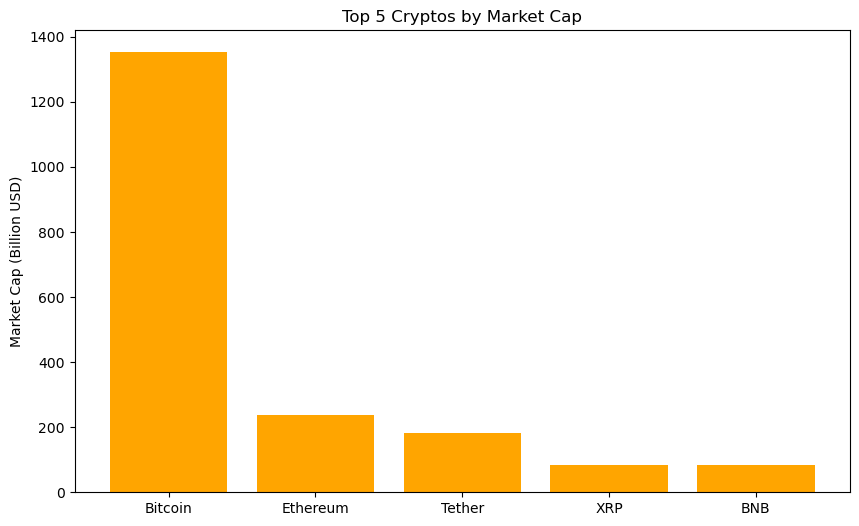

In [145]:
import matplotlib.pyplot as plt

# Market Cap Bar Chart
plt.figure(figsize=(10,6))
plt.bar(df['name'], df['market_cap']/1e9, color='orange')
plt.ylabel("Market Cap (Billion USD)")
plt.title("Top 5 Cryptos by Market Cap")
plt.show()

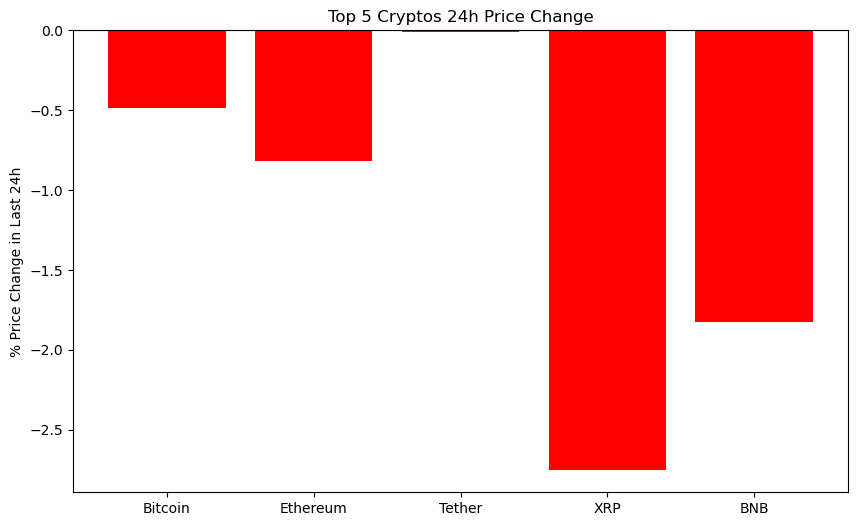

In [157]:
plt.figure(figsize=(10,6))

colors = ['green' if x > 0 else 'red' 
          for x in df['price_change_percentage_24h']]

plt.bar(df['name'], df['price_change_percentage_24h'], color=colors)

plt.axhline(0)  # zero line
plt.ylabel("% Price Change in Last 24h")
plt.title("Top 5 Cryptos 24h Price Change")

plt.show()

### Step 4: Save / Export Data for Future Use

In [154]:
# Save to CSV for record-keeping or future analytics
df.to_csv("top5_crypto_analysis.csv", index=False)

### ✅ Project Summary

#### Professional Workflow Completed:

* Defined business questions

* Fetched data from CoinGecko API

* Flattened and cleaned JSON data

* Calculated derived metrics (ATH/ATL %, ROI)

* Answered each question individually

* Ranked coins using multi-factor scoring

* Visualized insights with charts

* Exported data for further analysis